In [61]:
# Import al required packages
import os
wd =  os.getcwd()

import pandas as pd
import numpy as np

import seaborn as sns # Makes graphs prettier
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

%timeit
%matplotlib inline
sns.set_style('darkgrid')

In [62]:
from pathlib import Path

full_path = os.getcwd()
str(Path(full_path).parents[0])  # "path/to"
str(Path(full_path).parents[1])  # "path"
str(Path(full_path).parents[2])  # "."


&#39;c:\\Users\\mjant&#39;

In [63]:
# Read the data
X_train = pd.read_csv(str(Path(full_path).parents[0]) + "/input/train.csv", index_col="PassengerId")
X_test = pd.read_csv(str(Path(full_path).parents[0]) + "/input/test.csv", index_col="PassengerId")

# Remove rows with missing target, separate target from predictors
X_train.dropna(axis=0, subset=['Survived'], inplace=True)
y = X_train['Survived']
# X_train.drop(['Survived'], axis=1, inplace=True)


In [64]:
X_train.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [65]:
X_test.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [66]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Feature Analysis and Creation
## Sex

Text(0.5, 1.0, &#39;Survival Rate by Sex&#39;)

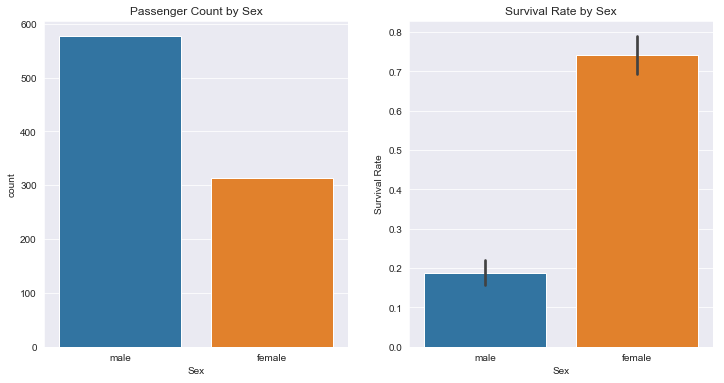

In [67]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
plot1 = sns.countplot(X_train['Sex'], ax=ax[0]).set_title('Passenger Count by Sex')
plot2 = sns.barplot(x = 'Sex', y = 'Survived', data = X_train, ax=ax[1]).set_ylabel('Survival Rate')
ax[1].set_title('Survival Rate by Sex')

## PClass

In [68]:
X_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, &#39;Survival Rate by Passenger Class and Sex&#39;)

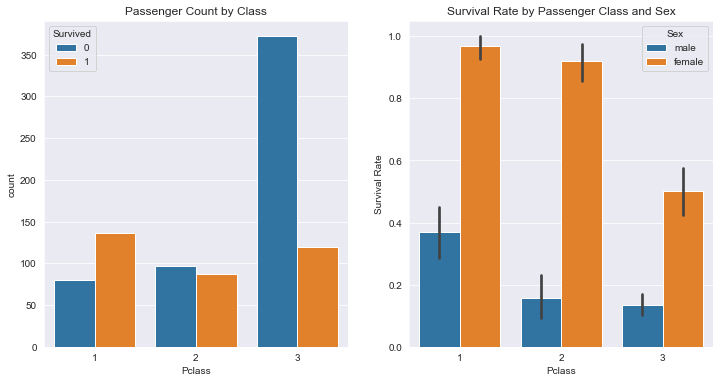

In [69]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
plot1 = sns.countplot(X_train['Pclass'], hue=X_train['Survived'], ax=ax[0]).set_title('Passenger Count by Class')
plot2 = sns.barplot(x = 'Pclass', y = 'Survived', hue='Sex', data = X_train, ax=ax[1]).set_ylabel('Survival Rate')
ax[1].set_title('Survival Rate by Passenger Class and Sex')

In [70]:
X_train.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

# Age

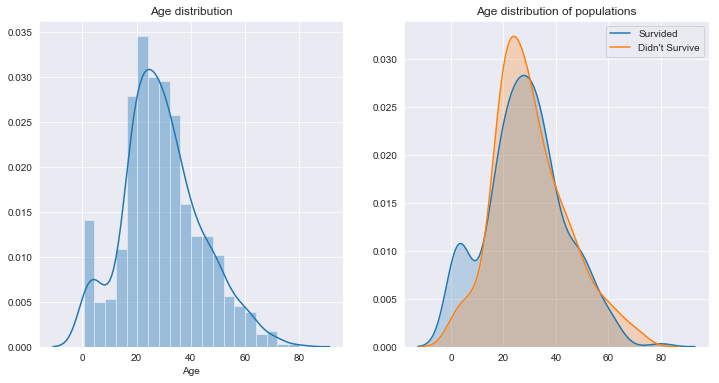

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('Age distribution')
plot1 = sns.distplot(X_train.Age, ax = ax[0], bins=20) 
ax[1].set_title('Age distribution of populations')
plot2 = sns.kdeplot(X_train[X_train.Survived == 1].Age, ax = ax[1], shade=True, label = "Survided")
plot2 = sns.kdeplot(X_train[X_train.Survived == 0].Age, ax = ax[1], shade=True, label = "Didn't Survive")

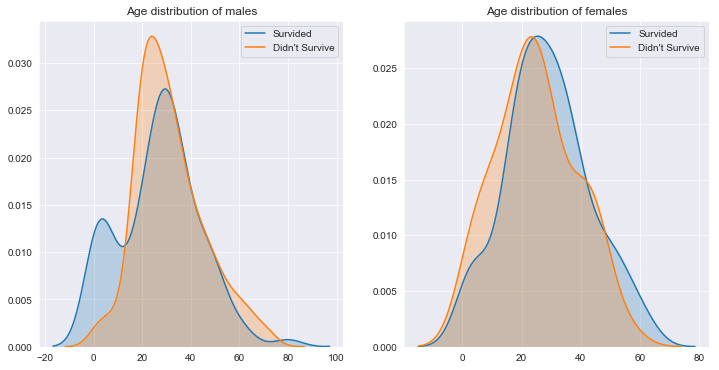

In [72]:
X_train[X_train.Survived == 1].Agefig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('Age distribution of males')
plot1 = sns.kdeplot(X_train[(X_train.Survived == 1) & (X_train.Sex == 'male')].Age, ax = ax[0], shade=True, label = "Survided")
plot1 = sns.kdeplot(X_train[(X_train.Survived == 0) & (X_train.Sex == 'male')].Age, ax = ax[0], shade=True, label = "Didn't Survive")
ax[1].set_title('Age distribution of females')
plot2 = sns.kdeplot(X_train[(X_train.Survived == 1) & (X_train.Sex == 'female')].Age, ax = ax[1], shade=True, label = "Survided")
plot2 = sns.kdeplot(X_train[(X_train.Survived == 0) & (X_train.Sex == 'female')].Age, ax = ax[1], shade=True, label = "Didn't Survive")

We can see that age seems to be a bigger factor in the survival rate of males

# Fare

In [73]:
X_train.Fare.describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

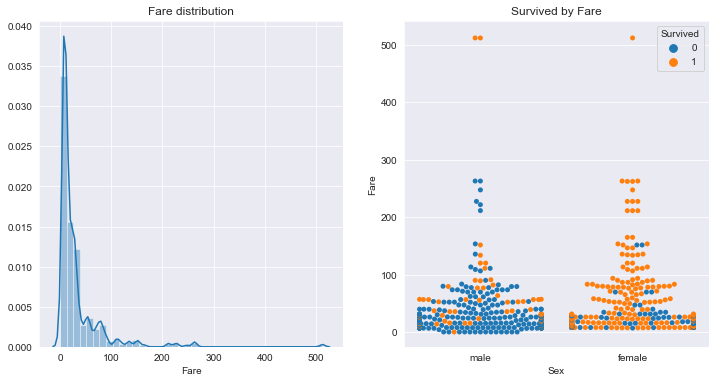

In [74]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('Fare distribution')
plot1 = sns.distplot(X_train.Fare, ax = ax[0], bins=40) 
ax[1].set_title('Survived by Fare')
plot2 = sns.swarmplot(x = 'Sex', y= 'Fare', hue='Survived', data=X_train, ax = ax[1]) 

In [78]:
# For fares that are 0, set them to Nan so it doesn't confuse the model
X_train.Fare.loc[X_train.Fare==0] = np.nan
X_test.Fare.loc[X_test.Fare==0] = np.nan

In [82]:
# Make a copy of the Name column to obtain the titles
X_train['Title'] = X_train['Name'].copy()
X_test['Title'] = X_test['Name'].copy()

# Use regex to get titles from passenger names
regex = '(.*, )|(\..*)'
X_train['Title'].replace(to_replace = regex, value='', inplace=True, regex=True)
X_test["Title"].replace(to_replace=regex, value='', inplace=True, regex=True)

female_rare_titles = ['Dona', 'Lady', 'the Countess']
male_rare_titles = ['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
X_train['Title'].replace(female_rare_titles, "Female rare title", inplace=True)
X_train['Title'].replace(male_rare_titles, "Male rare title", inplace=True)
X_test['Title'].replace(female_rare_titles, "Female rare title", inplace=True)
X_test['Title'].replace(male_rare_titles, "Male rare title", inplace=True)

# Also reassign mlle, ms, and mme accordingly
X_train['Title'].replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)
X_test['Title'].replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [83]:
X_train.Title.value_counts()

Mr                   517
Miss                 185
Mrs                  126
Master                40
Male rare title       21
Female rare title      2
Name: Title, dtype: int64

In [84]:
X_test.Title.value_counts()

Mr                   240
Miss                  79
Mrs                   72
Master                21
Male rare title        5
Female rare title      1
Name: Title, dtype: int64

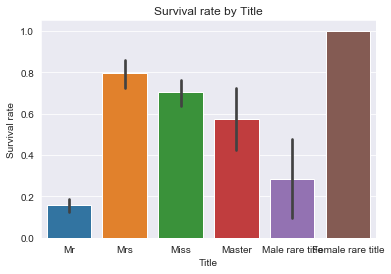

In [86]:
plt.title('Survival rate by Title')
plot1 = sns.barplot(x='Title', y='Survived', data=X_train).set_ylabel('Survival rate')

## Cabin and Ticket

The Cabin feature is somewhat problematic as there are many missing values.
I don't expect it to help our model too much so I don't even analyze it.
On the other side, a correctly engineered Ticket column is the best way to find family groups but it is not the approach I chose for this notebook (I will maybe try it in another one).
Since it is a pity to delete it knowing its full potential, I decided to create two new columns: one for the ticket first two letters and the second one for the ticket length.

In [91]:
# Extract the first two letters
X_train['Ticket_lett'] = X_train.Ticket.apply(lambda x: x[:2])
X_test['Ticket_lett'] = X_test.Ticket.apply(lambda x: x[:2])

# Calculate ticket length
X_train['Ticket_len'] = X_train.Ticket.apply(lambda x: len(x))
X_test['Ticket_len'] = X_test.Ticket.apply(lambda x: len(x))



## Family Size

In [88]:
# Create a family size variable including the passenger themselves
X_train["Fsize"] = X_train.SibSp + X_train.Parch + 1
X_test["Fsize"] = X_test.SibSp + X_test.Parch + 1

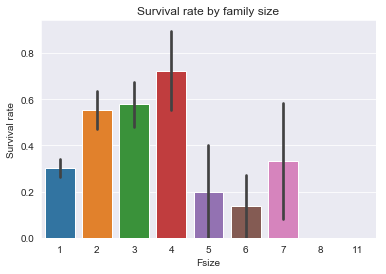

In [89]:
plt.title('Survival rate by family size')
g = sns.barplot(x='Fsize', y='Survived', data=X_train).set_ylabel('Survival rate')

# Modeling

In [93]:
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fsize', 'Ticket_len', 'Ticket_lett']
X = X_train[features]
X.head()

,Pclass,Fare,Title,Embarked,Fsize,Ticket_len,Ticket_lett
PassengerId,,,,,,,
1,3,7.2500,Mr,S,2,9,A/
2,1,71.2833,Mrs,C,2,8,PC
3,3,7.9250,Miss,S,1,16,ST
4,1,53.1000,Mrs,S,2,6,11
5,3,8.0500,Mr,S,1,6,37


## Pipeline

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [97]:
numerical_cols = ['Fare', 'Fsize']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Ticket_len', 'Ticket_lett']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.823


In [106]:
model = GradientBoostingClassifier()
GBC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

parameters = {}
parameters['model__learning_rate'] = [0.0015, 0.002, 0.0025]
parameters['model__n_estimators'] = [1500,2000,2500]
parameters['model__max_depth'] = [4,5,6]

gsGBC = GridSearchCV(GBC_pipeline, param_grid = parameters, cv=10, n_jobs=-1)
gsGBC.fit(X,y)

print("BEST PARAMS: ", gsGBC.best_params_)
print("BEST SCORE:", gsGBC.best_score_)
# print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

BEST PARAMS:  {&#39;model__learning_rate&#39;: 0.0025, &#39;model__max_depth&#39;: 6, &#39;model__n_estimators&#39;: 2000}
BEST SCORE: 0.8294051627384961
Cross validation score: 0.834


In [110]:
model = GradientBoostingClassifier(learning_rate=0.0015, max_depth=6, n_estimators=2000)
GBC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
GBC_pipeline.fit(X,y)
print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.835


In [99]:
X_test = X_test[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fsize,Ticket_len,Ticket_lett
PassengerId,,,,,,,
892,3,7.8292,Mr,Q,1,6,33
893,3,7.0000,Mrs,S,2,6,36
894,2,9.6875,Mr,Q,1,6,24
895,3,8.6625,Mr,S,1,6,31
896,3,12.2875,Mrs,S,3,7,31


In [111]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)
# predictions = GBC_pipeline.predict(X_test)

In [112]:
submission = pd.DataFrame({'PassengerId': X_test.index, 'Survived': predictions})
submission.to_csv('submission2_2.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
